In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Regression

In [ ]:
from sqlalchemy import text, create_engine

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_student_data():
    filename = "student_grades.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # Create the engine
        engine = create_engine(get_connection('db'))

        # Read the SQL query into a dataframe
        df = pd.read_sql(text('<sql_query>'), engine.connect())

        df.to_csv(filename)

        return df

# replace white space with np.nan
df = df.replace(r'^\s*$', np.nan, regex=True)

### Acquisition and Prep

### Scaling Numeric Data

### Exploring

In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_7001/1762825506.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_7001/1762825506.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, linewidths=.5, annot=True,


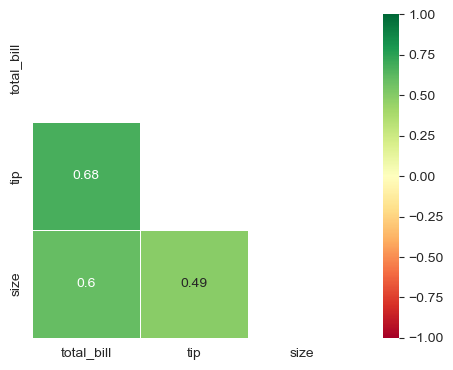

In [76]:
def plot_heatmap(df):
    '''
    Plots heatmap of DataFrame correlations
    '''
    plt.figure(figsize=(len(df.columns), len(df.columns) * .6))
    sns.set_style('white')
    
    mask = np.triu(np.ones_like(df.corr()))
    sns.heatmap(df.corr(), mask=mask, linewidths=.5, annot=True,
                         cmap='RdYlGn', vmin=-1, vmax=1, square=True)
    plt.show()
plot_heatmap(df)

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_7001/759699785.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr().iloc[1:,:-1]),k=1)
/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_7001/759699785.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,


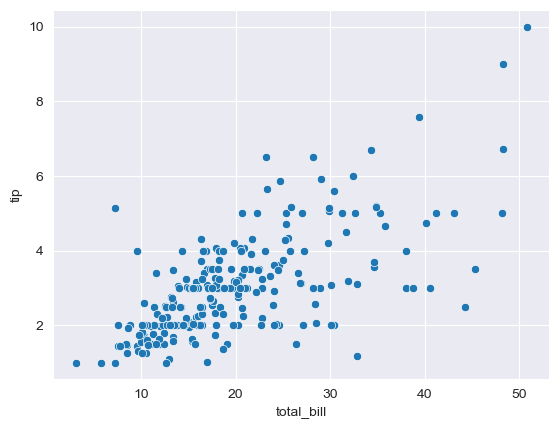

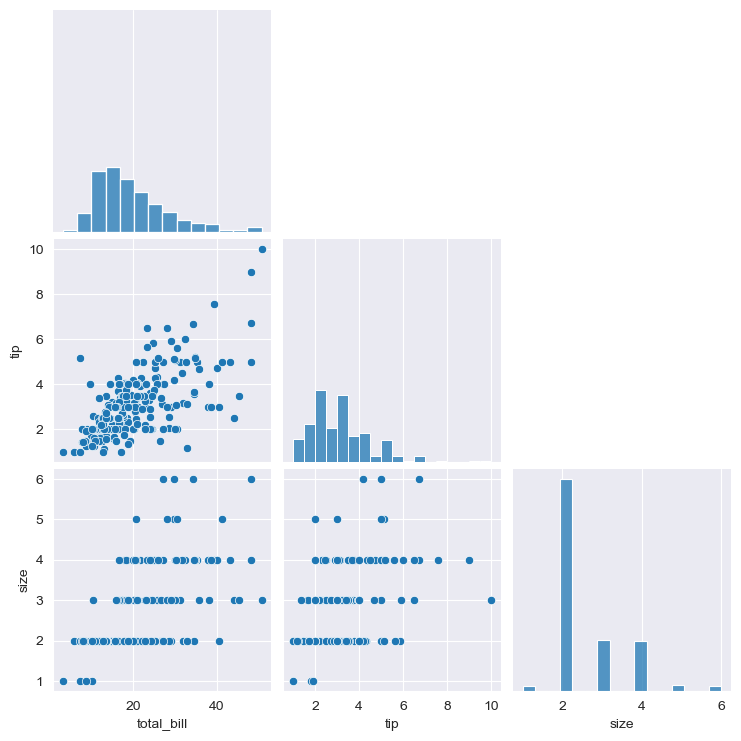

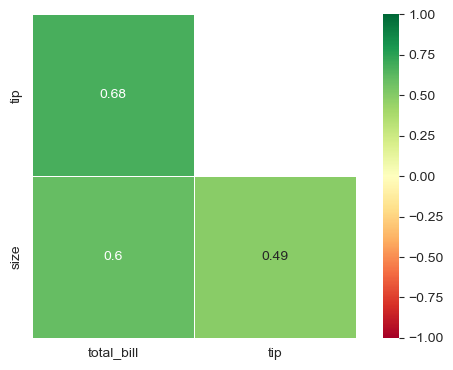

In [74]:
df = tips
col = 'total_bill'
target = 'tip'
cont_cols = ['total_bill','tip']

sns.set_style('darkgrid')

def plot_heatmap(df):
    '''
    Plots heatmap of DataFrame correlations
    '''
    plt.figure(figsize=(len(df.columns), len(df.columns) * .6))
    sns.set_style('white')
    
    mask = np.triu(np.ones_like(df.corr().iloc[1:,:-1]),k=1)
    sns.heatmap(df.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,
                         cmap='RdYlGn', vmin=-1, vmax=1, square=True)
    plt.show()


sns.scatterplot(x=col, y=target, data=df)

sns.pairplot(df, corner=True)

plot_heatmap(df)



In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dataframe.corr()[['Sale Price']].sort_values(by='Sale Price',
                                                                   ascending=False),
                                                                   vmin=-1, vmax=1,
                                                                   annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);


def plot_bivariate_cont_to_cont_target_charts(df, target, col):
    sns.set_style('darkgrid')
    fig, axes = plt.subplots(2, 2, figsize=(7.5, 7.5))
    plt.subplots_adjust(hspace=.3, wspace=0.4)
    
    col_label = ' '.join([word.capitalize() for word in col.split('_')])

    # first plot
    sns.barplot(x=target, y=col, data=df, errorbar=None, ax=axes[0,0])
    # Annotate the bars
    for p in axes[0,0].patches:
        axes[0,0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                            ha='center', va='bottom')
    axes[0,0].set_title(f'''{col_label} Averages''')
    axes[0,0].set_xlabel(target.capitalize())
    axes[0,0].set_xticks([0, 1], ['No', 'Yes'])
    axes[0,0].set_ylabel(col_label)
#     axes[0,0].set_yticks(range(0,
#                                int(max(df[df[target]==1][col].mean(), df[df[target]==0][col].mean()))+25,
#                                5))
#     # add line indicating total tenure average
#     axes[0,0].axhline(df[col].mean(), label=f'Total {col_label} mean', color='red')
#     axes[0,0].annotate(f'''{df[col].mean():.2f}''', xy=(.5, df[col].mean()),
#                         ha='center', va='bottom')
    # Display the legend
#     axes[0,0].legend(loc='upper right', edgecolor='black')

    # second plot
    sns.stripplot(data=df, x=target, y=col, hue=target, jitter=.3,
                  size=1.5, ax=axes[0,1], legend=False)
    axes[0,1].set_title(f'''{col_label} by {target.capitalize()}''')
    axes[0,1].set_xlabel(target.capitalize())
    axes[0,1].set_xticks([0, 1], ['No', 'Yes'])
    axes[0,1].set_ylabel(col_label)

    plt.xticks()


    # third plot
    sns.histplot(hue=target, x=col, data=df[df[target]==0], ax=axes[1,0], legend=False)
    axes[1,0].set_title(f'''{col_label} Distribution of Non-{target.capitalize()}''')
    axes[1,0].set_xlabel(target.capitalize())

    # fourth plot
    sns.histplot(hue=target, x=col, data=df[df[target]==1], ax=axes[1,1],
                 palette=['orange'], legend=False)
    axes[1,1].set_title(f'''{col_label} Distribution of {target.capitalize()}''')
    axes[1,1].set_xlabel(target.capitalize())

    plt.show()


In [ ]:
def explore_bivariate_cont_to_cont_target(df, target, cont_cols=None):
    '''
    Explores continuous feature relationships to categorical target
    Provides descriptive stats for each target category
    Shows continuous feature correlations for two-category target
    Plots bar chart of feature averages for each target category
    '''

    # set default categorical columns
    if cont_cols == None:
        cont_cols = get_cat_and_cont_cols(df)[1]
        
    # display descriptive stats for each target category
    display(df.groupby(target)[cont_cols].describe().T)
    
#     # display, in order, pearson R correlations to the target if target is binary
#     if len(df[target].unique()) == 2:
#         print(f'Continuous feature correlations (Pearson R) to {target}:')
#         display(df[cont_cols+[target]].corr()[target]\
#                                       .sort_values(ascending=False))
    plot_bivariate_cont_to_cat_target_charts(df, target, col)
    for col in cont_cols:
        plot_bivariate_cont_to_cat_target_charts(df, target, col)
#         plt.figure(figsize=(3, 3)) 
#         sns.barplot(x=target, y=col, data=df, estimator='mean')
#         # Annotate the bars
#         ax = plt.gca()
#         for p in ax.patches:
#             ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
#                         ha='center', va='bottom')
#         plt.title(f'{col} averages')
#         # add line indicating estimate of all targets
#         plt.axhline(df[col].mean(), label=f'Total {col} mean', color='red')
#         # plt.legend()
#         plt.show()
#         print()
        
     plot_heatmap(df[cont_cols+[target]])

### Evaluating Regression Models

### Feature Engineering

### Modeling